In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)

import itertools as it
from collections import Counter, defaultdict, deque
from toolz.curried import *
from weather import TornadoEnv
from exact import solve

from agents import Agent, run_episode
from policies import LiederPolicy, FunctionPolicy

## Play around

In [2]:
env = TornadoEnv(n_city=3, evac_cost=1, false_neg_cost=20, max_sims=20)
Q, V, pi, info = solve(env)
V(env.init)

-1.2597330156633484

In [5]:
pol = LiederPolicy([0, 1, 1, 0, 1])
trace = run_episode(pol, env)
print(trace['actions'])
sa = iter(zip(trace['states'], trace['actions']))

[0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3]


In [6]:
df = pd.DataFrame(Agent(env, pol).run_many(1000))
df['return'].mean()

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

-1.1996665490714111

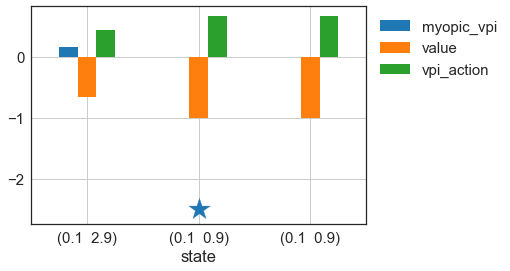

In [11]:
state, action = next(sa)
df = pd.DataFrame({
    'vpi_action': [env.vpi_action(state, a) for a in env._actions[:-1]],
    'myopic_vpi': [env.myopic_voc(state, a) for a in env._actions[:-1]],
    'value': [env.value(state, a) for a in env._actions[:-1]],
    'state': [f'({s[0]}  {s[1]})' for s in state]
}).set_index('state')
df.plot.bar(stacked=False, legend=False, rot=0)
plt.legend(bbox_to_anchor=(1,1))
plt.scatter([action], [-2.5], marker='*', s=500)
plt.grid()

## Load simulations

In [65]:
from glob import glob
df = pd.concat(map(pd.read_csv, glob('data/weather/sims/*')))

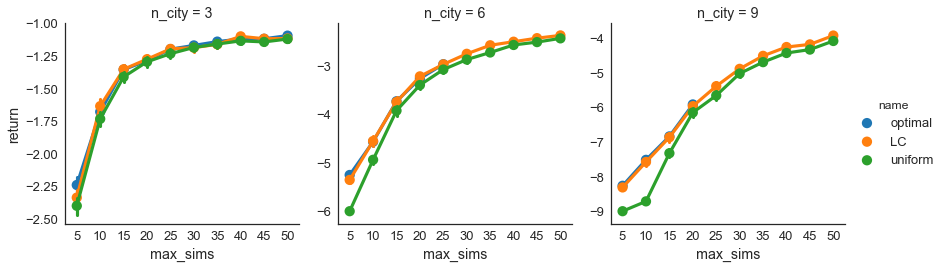

In [75]:
sns.factorplot('max_sims', 'return', hue='name', col='n_city', sharey='none', data=df)

## Load policies

In [78]:
from os import listdir
import joblib
results = {}
policies = {}
for pkl in listdir('data/weather/opt_results'):
    n_city, max_sim = map(int, pkl.strip('.pkl').split('_'))
    results[n_city, max_sim] = res = joblib.load(f'data/weather/opt_results/{pkl}')
    policies[n_city, max_sim] = LiederPolicy([0, 1, res.x, 0, 1])
    
    
    